# Inicialización de pytorch

Para empezar es necesario importar el paquete. Luego se puede verificar qué versión está instalado

In [ ]:
import torch

In [ ]:
torch.version.__version__

'1.8.0+cu101'

In [1]:
torch.cuda.is_available()

NameError: ignored

In [ ]:
a = torch.ones(3,3)

In [ ]:
a

tensor([[1., 1., 1.],
        [1., 1., 1.],
        [1., 1., 1.]])

In [ ]:
b = torch.ones(3,3)

In [ ]:
a + b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]])

In [ ]:
a = a.to('cuda')
b = b.to('cuda')
a + b

tensor([[2., 2., 2.],
        [2., 2., 2.],
        [2., 2., 2.]], device='cuda:0')

In [ ]:
a @ b

tensor([[3., 3., 3.],
        [3., 3., 3.],
        [3., 3., 3.]], device='cuda:0')

In [ ]:
a = torch.rand(5, 5)
b = torch.rand(5, 5)
r_cpu = a @ b
a = a.to('cuda')
b = b.to('cuda')
r_gpu = a @ b

In [ ]:
dif = r_cpu - r_gpu.to('cpu')
dif.sum()

tensor(-5.9605e-08)

In [ ]:
K = 3000;
m1 = torch.rand(K, K)
m2 = torch.rand(K, K)

In [ ]:
%timeit -n1 -o m1 @ m2

1 loop, best of 5: 613 ms per loop


<TimeitResult : 1 loop, best of 5: 613 ms per loop>

In [ ]:
cpu_time = _
cpu_time.all_runs

[0.663871022999956,
 0.6402178349999303,
 0.6129838129991185,
 0.6359616050003751,
 0.6643534260001616]

In [ ]:
m1 = torch.rand(K, K)
m2 = torch.rand(K, K)
m1 = m1.to('cuda')
m2 = m2.to('cuda')

In [ ]:
%timeit -n1 -o m1 @ m2

The slowest run took 37.94 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 15.5 µs per loop


<TimeitResult : 1 loop, best of 5: 15.5 µs per loop>

In [ ]:
gpu_time = _

In [ ]:
cpu_time_tensor = torch.tensor(cpu_time.all_runs)
cpu_time_max = cpu_time_tensor.max()
gpu_time_tensor = torch.tensor(gpu_time.all_runs)
gpu_time_max = gpu_time_tensor.max()


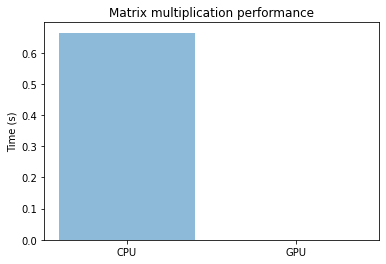

CPU: 0.6643534302711487 seconds
GPU: 0.0005867049912922084 seconds


In [ ]:
import matplotlib.pyplot as plt
objects = ('CPU', 'GPU')
pos = range(len(objects))
performance = [cpu_time_max,gpu_time_max]

y=plt.bar(pos, performance, align='center', alpha=0.5)
plt.xticks(pos, objects)
plt.ylabel('Time (s)')
plt.title('Matrix multiplication performance')

plt.show()

print(f"CPU: {cpu_time_max} seconds")
print(f"GPU: {gpu_time_max} seconds")

In [ ]:
import numpy as np
rg = np.random.default_rng(1)
m3 = rg.random((K,K))
m4 = rg.random((K,K))


In [ ]:
%timeit -n1 -o m3 @ m4

1 loop, best of 5: 1.3 s per loop


<TimeitResult : 1 loop, best of 5: 1.3 s per loop>

In [ ]:
np_time = _

In [ ]:
np_time_tensor = torch.tensor(np_time.all_runs)
np_time_max = np_time_tensor.mean()
np_time_max

tensor(1.3217)

In [ ]:
m1 = torch.from_numpy(m3)
m2 = torch.from_numpy(m4)
m1 = m1.to('cuda')
m2 = m2.to('cuda')

In [ ]:
%timeit -n1 -o m1 @ m2

The slowest run took 59.44 times longer than the fastest. This could mean that an intermediate result is being cached.
1 loop, best of 5: 12.3 µs per loop


<TimeitResult : 1 loop, best of 5: 12.3 µs per loop>

In [ ]:
gpu_time = _
gpu_time.all_runs

[0.0007325410006160382,
 3.503599964460591e-05,
 1.677699947322253e-05,
 1.3144000149623025e-05,
 1.2323999726504553e-05]

In [ ]:
gpu_time_tensor = torch.tensor(gpu_time.all_runs)
gpu_time_max = gpu_time_tensor.max()

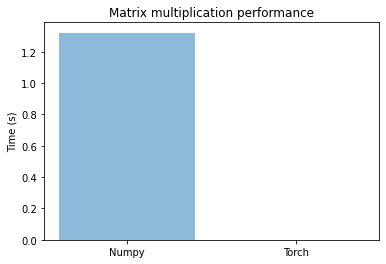

Numpy CPU: 1.3217105865478516 seconds
Torch GPU: 0.0007325410260818899 seconds


In [ ]:
objects = ('Numpy', 'Torch')
pos = range(len(objects))
performance = [np_time_max,gpu_time_max]

y=plt.bar(pos, performance, align='center', alpha=0.5)
plt.xticks(pos, objects)
plt.ylabel('Time (s)')
plt.title('Matrix multiplication performance')

plt.show()

print(f"Numpy CPU: {np_time_max} seconds")
print(f"Torch GPU: {gpu_time_max} seconds")

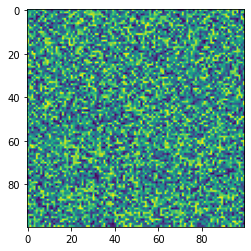

In [ ]:
img = torch.rand(100,100)
plt.imshow(img)

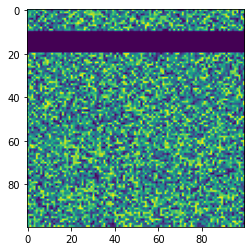

In [ ]:
img[10:20,:]=0
plt.imshow(img)

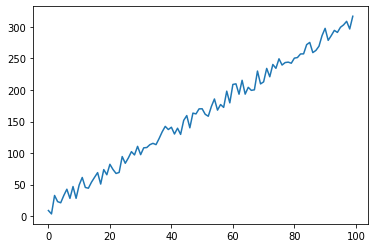

In [ ]:
x = torch.tensor(range(100))
y = 3*x + 14
y = y + 30*(torch.rand(x.shape[0]) - 0.5)
plt.plot(x,y)

In [ ]:
x.shape[0]


10